# Trabecular Segmentation Example

- **By:** [Michael T. Kuczynski](https://www.linkedin.com/in/mkuczyns/), 2024  
- **License:** CC-BY 
- **How to cite:** Cite the ORMIR_XCT publication: *Kuczynski, M.T., et al. "ORMIR_XCT: A Python package for high resolution peripheral quantitative computed tomography image processing." arXiv preprint arXiv:2309.04602 (2023).*

---
# Aims

- This Jupyter Notebook provides an example of running the trabecular segmentation script in the ORMIR_XCT package. The results of this segmentation are compared to results from the standard IPL workflow.

  **Table of contents**  
  [Step 1: Imports](#Imports)   
  [Step 2: Trabecular Segmentation](#Segmentation)  
  [Step 3: Display Results](#Results)  
  [Step 4: Compare IPL to ORMIR_XCT](#Compare)

---

<a name="Imports"></a>
## *Step 1: Imports*

Import modules/packages and set the input image path. 

In [14]:
import os
import numpy as np
import SimpleITK as sitk

from matplotlib import pyplot as plt

from ormir_xct.segmentation.ipl_seg import ipl_seg, threshold_dict
from ormir_xct.util.segmentation_evaluation import (
    calculate_dice_and_jaccard,
    hausdorff_sitk,
)

In [15]:
joint_seg_path = os.path.join("images", "GRAY_JOINT.nii")
joint_seg_ipl_path = os.path.join("images", "TRAB_SEG_IPL.nii")
output_path = "images"

gray_img = sitk.ReadImage(joint_seg_path, sitk.sitkFloat32)
ipl_mask = sitk.ReadImage(joint_seg_ipl_path, sitk.sitkUInt8)

---

<a name="Segmentation"></a>
## *Step 2: Trabecular Segmentation*

Run the ORMIR_XCT trabecular segmentation script on the input grayscale joint image. 

We also need the lower and upper threshold limits. These are constant values defined in the IPL segmentation workflow and a re provided in `threshold_dict` in the `ipl_seg.py` file. Depending on your image units, these thresholds will change. In this example, we will use HU units since our image is in HU.

In [16]:
mu_water = 0.24090
mu_scaling = 8192
resale_slope = 1603.51904
rescale_intercept = -391.209015
lower_thresh = threshold_dict["HU_Lower"]
upper_thresh = threshold_dict["HU_Upper"]

trab_seg_ormir = ipl_seg(
    gray_img,
    lower_thresh,
    upper_thresh,
    voxel_size=0.0606964,
    sigma=0.5,
)

---

<a name="Results"></a>
## *Step 3: Display Results*

Now display the ORMIR_XCT and IPL segmentations together.

In [17]:
ipl_mask = sitk.Resample(
    ipl_mask, trab_seg_ormir, interpolator=sitk.sitkNearestNeighbor
)

# Convert the images to numpy arrays for plotting with Matplotlib
gray_np = sitk.GetArrayFromImage(gray_img)
ormir_np = sitk.GetArrayFromImage(trab_seg_ormir)
ipl_np = sitk.GetArrayFromImage(ipl_mask)

In [18]:
# Get the slices we want to view
view_slice1 = (slice(None), 45 - ormir_np.shape[1] // 2, slice(None))
view_slice2 = (slice(None), ormir_np.shape[1] // 2, slice(None))
view_slice3 = (slice(None), 45 + ormir_np.shape[1] // 2, slice(None))

slice1 = abs(int(45 - ormir_np.shape[1] // 2))
slice2 = int(ormir_np.shape[1] // 2)
slice3 = int(45 + ormir_np.shape[1] // 2)

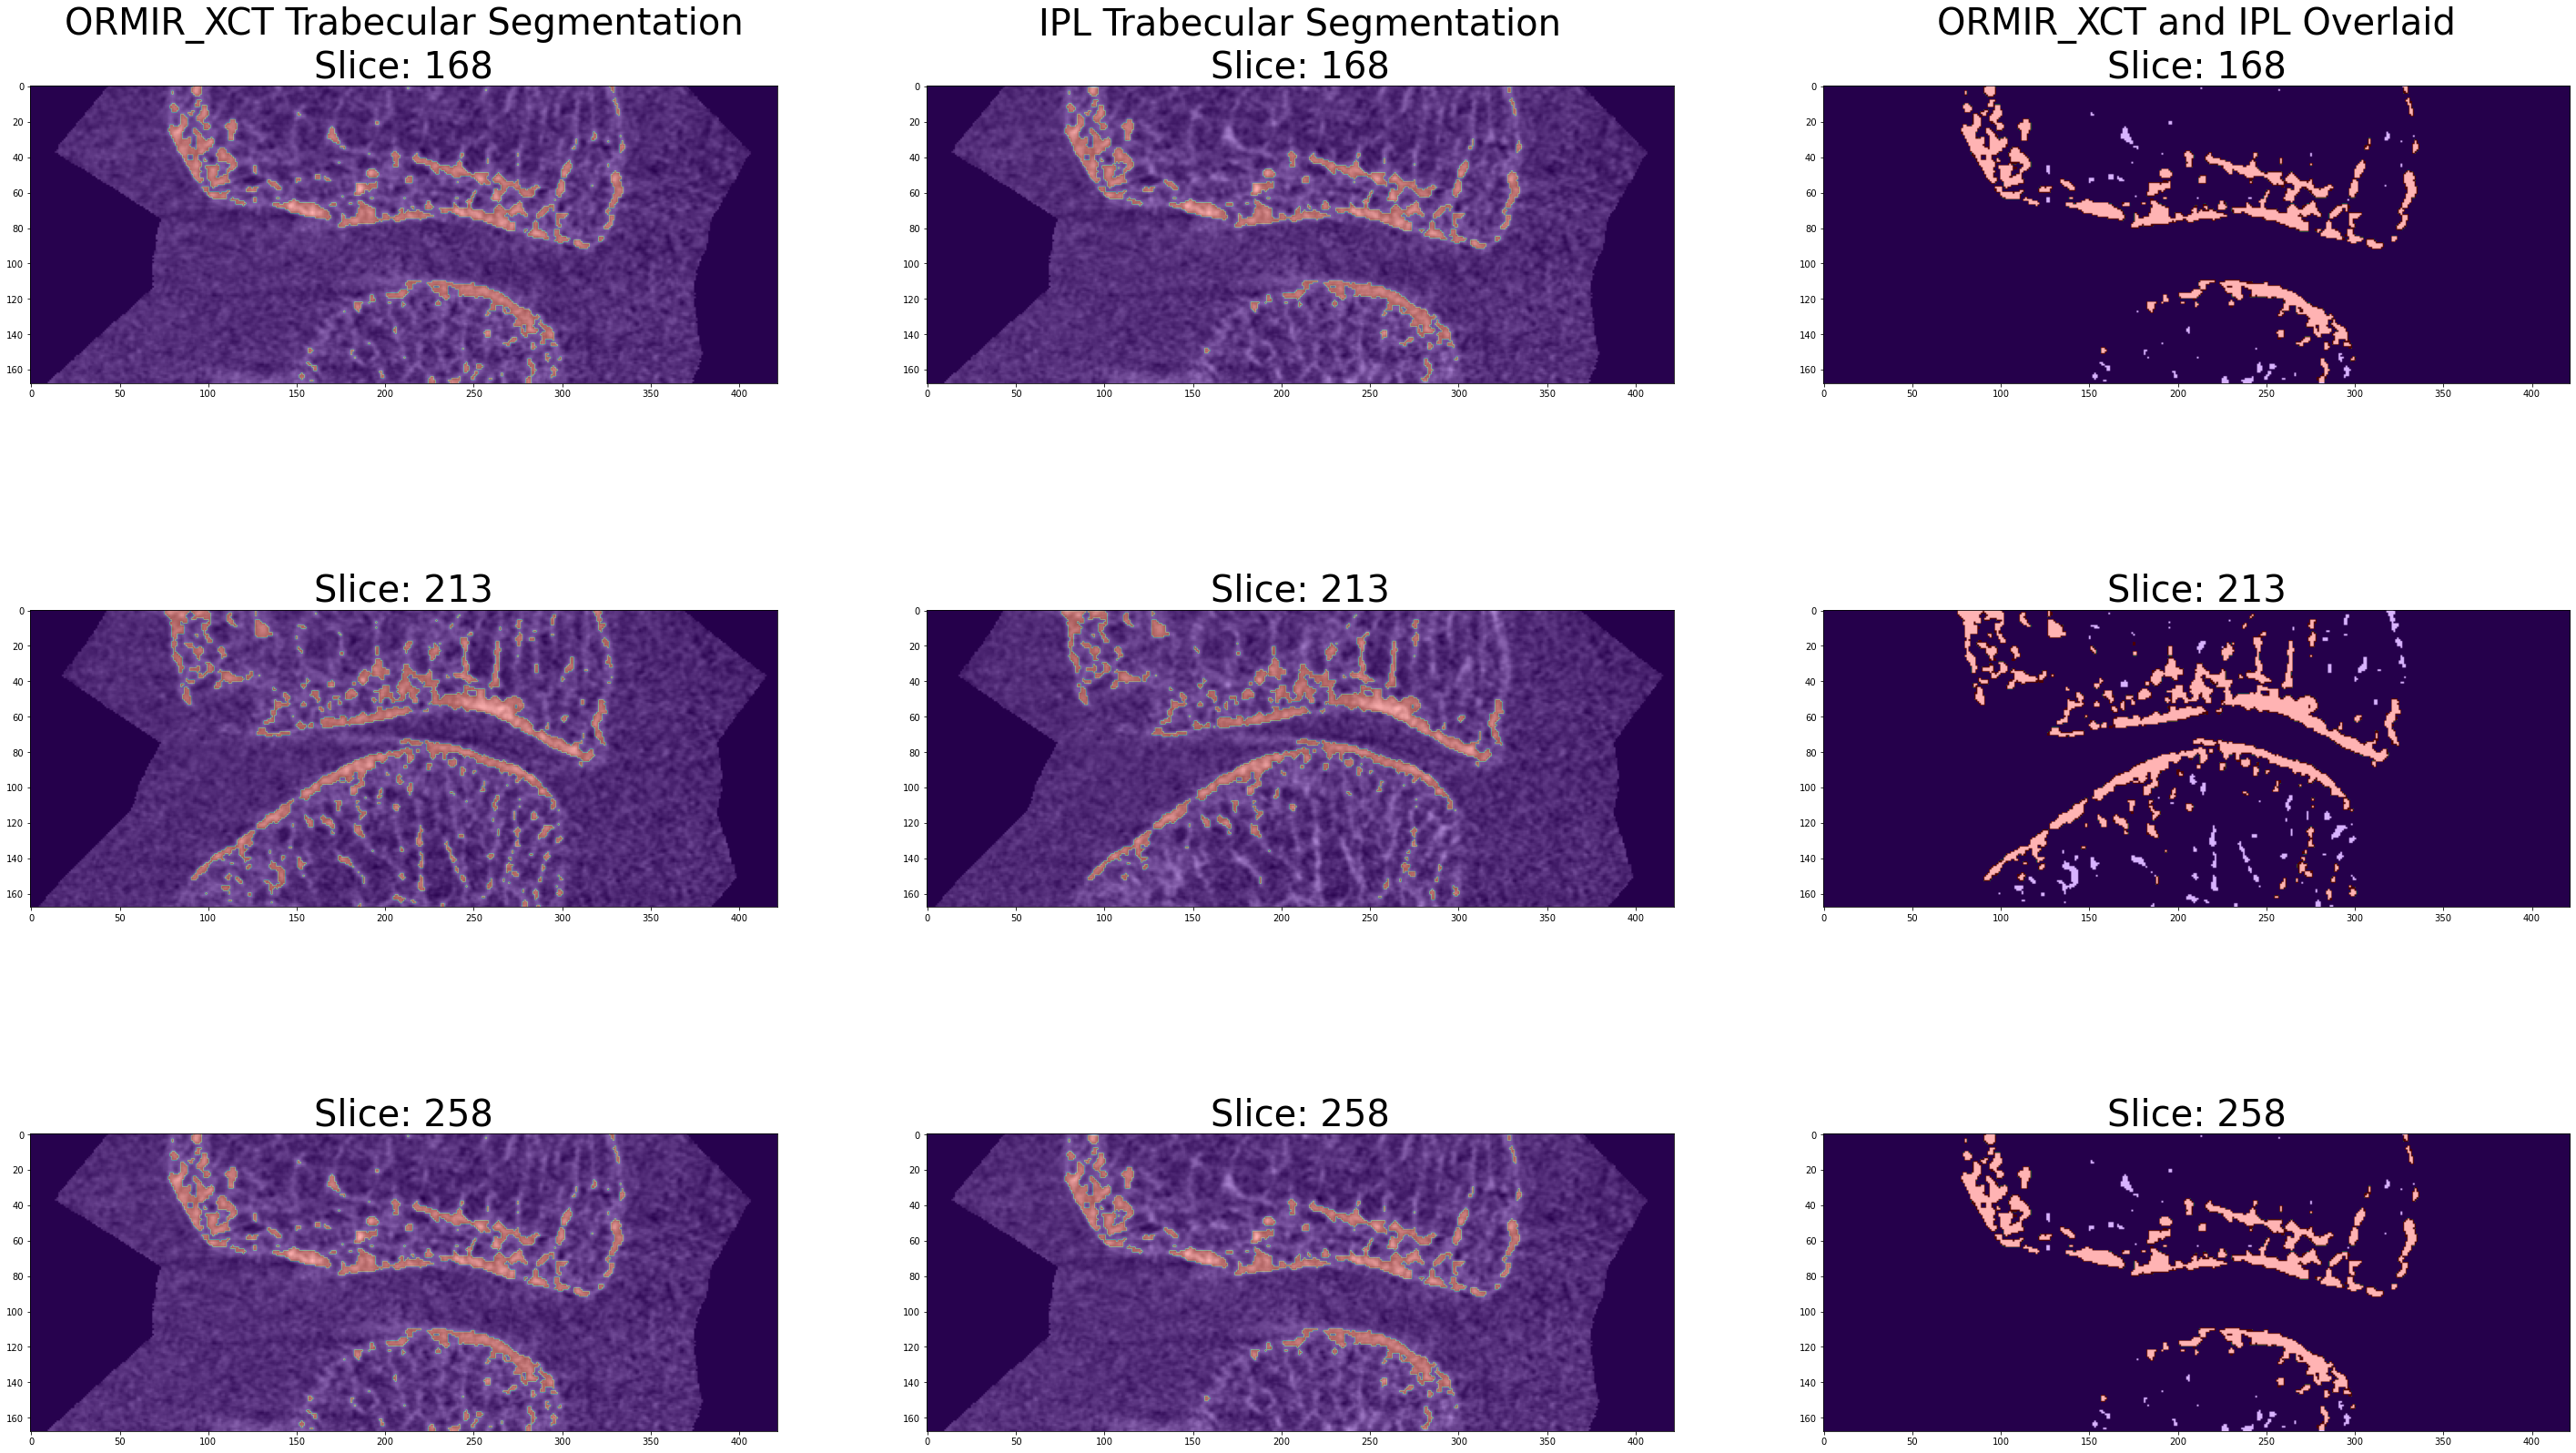

In [19]:
# Plot the segmentations overlaid onto the grayscale image for 3 slices
fig, axs = plt.subplots(3, 3, figsize=(50, 30))

# Slice 1
axs[0][0].set_title(
    "ORMIR_XCT Trabecular Segmentation\nSlice: {}".format(slice1), fontsize=40
)
axs[0][0].imshow(gray_np[view_slice1], cmap="gray")
axs[0][0].imshow(ormir_np[view_slice1], cmap="rainbow", alpha=0.3)

axs[0][1].set_title(
    "IPL Trabecular Segmentation\nSlice: {}".format(slice1), fontsize=40
)
axs[0][1].imshow(gray_np[view_slice1], cmap="gray")
axs[0][1].imshow(ipl_np[view_slice1], cmap="rainbow", alpha=0.3)

axs[0][2].set_title("ORMIR_XCT and IPL Overlaid\nSlice: {}".format(slice1), fontsize=40)
axs[0][2].imshow(ormir_np[view_slice1], cmap="gray")
axs[0][2].imshow(ipl_np[view_slice1], cmap="rainbow", vmin=0, vmax=1, alpha=0.3)

# Slice 2
axs[1][0].set_title("Slice: {}".format(slice2), fontsize=40)
axs[1][0].imshow(gray_np[view_slice2], cmap="gray")
axs[1][0].imshow(ormir_np[view_slice2], cmap="rainbow", alpha=0.3)

axs[1][1].set_title("Slice: {}".format(slice2), fontsize=40)
axs[1][1].imshow(gray_np[view_slice2], cmap="gray")
axs[1][1].imshow(ipl_np[view_slice2], cmap="rainbow", alpha=0.3)

axs[1][2].set_title("Slice: {}".format(slice2), fontsize=40)
axs[1][2].imshow(ormir_np[view_slice2], cmap="gray")
axs[1][2].imshow(ipl_np[view_slice2], cmap="rainbow", vmin=0, vmax=1, alpha=0.3)

# Slice 3
axs[2][0].set_title("Slice: {}".format(slice3), fontsize=40)
axs[2][0].imshow(gray_np[view_slice3], cmap="gray")
axs[2][0].imshow(ormir_np[view_slice3], cmap="rainbow", alpha=0.3)

axs[2][1].set_title("Slice: {}".format(slice3), fontsize=40)
axs[2][1].imshow(gray_np[view_slice3], cmap="gray")
axs[2][1].imshow(ipl_np[view_slice3], cmap="rainbow", alpha=0.3)

axs[2][2].set_title("Slice: {}".format(slice3), fontsize=40)
axs[2][2].imshow(ormir_np[view_slice3], cmap="gray")
axs[2][2].imshow(ipl_np[view_slice3], cmap="rainbow", vmin=0, vmax=1, alpha=0.3)

plt.show()

---

<a name="Compare"></a>
## *Step 4: Compare IPL to ORMIR_XCT*

Now compare segmentations using metrics.

To compute the metrics, we need to make sure our images are the same size. Use the SimpleITK resample procedural interface to ensure image sizes match.

In [20]:
dice, jaccard = calculate_dice_and_jaccard(ipl_np, ormir_np)
hausdorff = hausdorff_sitk(ipl_mask, trab_seg_ormir)

print("DICE: ", dice)
print("Jaccard: ", jaccard)
print("Mean Hausdorff Distance: ", hausdorff[0])
print("Maximum Hausdorff Distance: ", hausdorff[1])

DICE:  0.9169765300789231
Jaccard:  0.8466820484931374
Mean Hausdorff Distance:  0.05215796793528115
Maximum Hausdorff Distance:  3.9416047257362727


---
<a name="attribution"></a>

Notebook created using the [template](https://github.com/ORMIRcommunity/templates/blob/main/ORMIR_nb_template.ipynb) of the [ORMIR community](https://ormircommunity.github.io/) (version 1.0, 2023)